## Se presenta el código para el algoritmo de retropropagación (backpropagation algorithm) implementado en python en base al pseudocódigo (Algorithm 1) dado en la sección 6 del reporte sobre el Algoritmo Backpropagation.

In [7]:
import numpy as np
from sklearn.neural_network import MLPClassifier

# --- IMPLEMENTACIÓN DE BACKPROPAGATION DESDE CERO ---

# Función de activación Sigmoide y su derivada
def sigmoid(x):
    """Calcula la función sigmoide."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Calcula la derivada de la función sigmoide."""
    return x * (1 - x)

class NeuralNetwork:
    """
    Una red neuronal simple con una capa oculta, entrenada con backpropagation.
    """
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        # Inicialización de pesos con valores aleatorios pequeños
        self.weights_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
        self.weights_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))
        
        # Inicialización de sesgos (biases) con ceros
        self.bias_hidden = np.zeros((1, hidden_nodes))
        self.bias_output = np.zeros((1, output_nodes))

    def feed_forward(self, inputs):
        """Paso de propagación hacia adelante."""
        # Capa oculta
        hidden_layer_activation = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(hidden_layer_activation)
        
        # Capa de salida
        output_layer_activation = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        predicted_output = sigmoid(output_layer_activation)
        
        return predicted_output

    def train(self, training_inputs, training_outputs, learning_rate, epochs):
        """
        Entrena la red usando el conjunto de datos, la tasa de aprendizaje y el número de épocas.
        """
        print("Entrenando la red neuronal implementada desde cero...")
        for epoch in range(epochs):
            total_error = 0
            # Este es el enfoque "online", actualizando tras cada ejemplo
            for inputs, target_output in zip(training_inputs, training_outputs):
                # 1. Propagación hacia adelante
                predicted_output = self.feed_forward(inputs)

                # 2. Cálculo del error
                error = target_output - predicted_output
                total_error += np.mean(error**2)

                # 3. Retropropagación del error (Cálculo de deltas)
                output_delta = error * sigmoid_derivative(predicted_output)
                hidden_error = output_delta.dot(self.weights_hidden_output.T)
                hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

                # 4. Actualización de pesos y sesgos
                self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
                self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
                
                self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
                self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
            
            if (epoch % 1000) == 0:
                print(f"Época {epoch}, Error: {total_error / len(training_inputs):.4f}")
        print("Entrenamiento finalizado.\n")

    def predict(self, inputs):
        """Realiza una predicción para una nueva entrada."""
        return self.feed_forward(inputs)

# --- COMPARACIÓN Y PRUEBA ---

# 1. PREPARACIÓN DE DATOS: EL PROBLEMA XOR
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

# 2. PARÁMETROS DE ENTRENAMIENTO
epochs = 10000
learning_rate = 0.1
input_nodes, hidden_nodes, output_nodes = 2, 4, 1

# 3. ENTRENAR Y PROBAR LA IMPLEMENTACIÓN PROPIA
nn = NeuralNetwork(input_nodes=input_nodes, hidden_nodes=hidden_nodes, output_nodes=output_nodes)
# Se reajusta la forma de los datos de entrada para el bucle
nn.train(X_train.reshape(4, 1, 2), y_train, learning_rate, epochs)

print("--- RESULTADOS ---")
print("Predicciones del modelo propio (entradas XOR):")
for i in range(len(X_train)):
    prediction = nn.predict(X_train[i:i+1])
    print(f"Entrada: {X_train[i]}, Predicción: {prediction[0][0]:.4f} -> {np.round(prediction[0][0])}")

print("\n" + "="*50 + "\n")

# 4. ENTRENAR Y PROBAR EL MODELO DE SCIKIT-LEARN
print("Entrenando la red neuronal de Scikit-learn...")
# Se usan parámetros equivalentes para una comparación justa
mlp = MLPClassifier(hidden_layer_sizes=(hidden_nodes,), activation='logistic', solver='sgd',
                    learning_rate_init=learning_rate, max_iter=epochs, momentum=0, random_state=42)
# .ravel() es necesario para el formato que espera scikit-learn
mlp.fit(X_train, y_train.ravel()) 
print("Entrenamiento finalizado.\n")

print("Predicciones del modelo de Scikit-learn (entradas XOR):")
predictions_sklearn = mlp.predict(X_train)
for i in range(len(X_train)):
    print(f"Entrada: {X_train[i]}, Predicción: {predictions_sklearn[i]}")

Entrenando la red neuronal implementada desde cero...
Época 0, Error: 0.3469
Época 1000, Error: 0.2475
Época 2000, Error: 0.2018
Época 3000, Error: 0.1103
Época 4000, Error: 0.0313
Época 5000, Error: 0.0134
Época 6000, Error: 0.0079
Época 7000, Error: 0.0054
Época 8000, Error: 0.0041
Época 9000, Error: 0.0032
Entrenamiento finalizado.

--- RESULTADOS ---
Predicciones del modelo propio (entradas XOR):
Entrada: [0 0], Predicción: 0.0561 -> 0.0
Entrada: [0 1], Predicción: 0.9514 -> 1.0
Entrada: [1 0], Predicción: 0.9505 -> 1.0
Entrada: [1 1], Predicción: 0.0514 -> 0.0


Entrenando la red neuronal de Scikit-learn...
Entrenamiento finalizado.

Predicciones del modelo de Scikit-learn (entradas XOR):
Entrada: [0 0], Predicción: 0
Entrada: [0 1], Predicción: 0
Entrada: [1 0], Predicción: 0
Entrada: [1 1], Predicción: 0


### Análisis de Resultados

Se observa una diferencia clave en las salidas de los dos modelos:

* **La implementación del algoritmo 1 logró aprender** la función XOR correctamente, validando el algoritmo descrito en el reporte. La red asigna las clases correctas (0, 1, 1, 0) a las entradas correspondientes.

* El modelo de **Scikit-learn**, con su inicialización aleatoria específica (`random_state=42`), **no convergió** a la solución correcta. En su lugar, quedó atrapado en un **mínimo local**, aprendiendo una solución subóptima que consiste en predecir siempre la clase '0'.

Este resultado no indica un error en el código, sino que es una demostración práctica de un desafío fundamental del descenso de gradiente: su alta sensibilidad al punto de partida aleatorio (la inicialización de los pesos), un concepto discutido en la sección de "Aspectos Prácticos" del reporte.

## El codigo que se presenta en la siguente celda es el mismo que el anterior pero este GENERA gráficos para mayor claridad sobre los resultados obtenidos.

Entrenando la red neuronal...
Época 0, Error: 0.3046
Época 1000, Error: 0.2534
Época 2000, Error: 0.2533
Época 3000, Error: 0.2531
Época 4000, Error: 0.2526
Época 5000, Error: 0.2476
Época 6000, Error: 0.2111
Época 7000, Error: 0.1456
Época 8000, Error: 0.0432
Época 9000, Error: 0.0155
Entrenamiento finalizado.

Gráfico de la historia de errores guardado como 'error_history.png'
Gráfico de la frontera de decisión guardado como 'decision_boundary.png'

--- PREDICCIONES FINALES ---
Entrada: [0 0], Predicción: 0.0882 -> 0.0
Entrada: [0 1], Predicción: 0.9057 -> 1.0
Entrada: [1 0], Predicción: 0.9154 -> 1.0
Entrada: [1 1], Predicción: 0.0991 -> 0.0


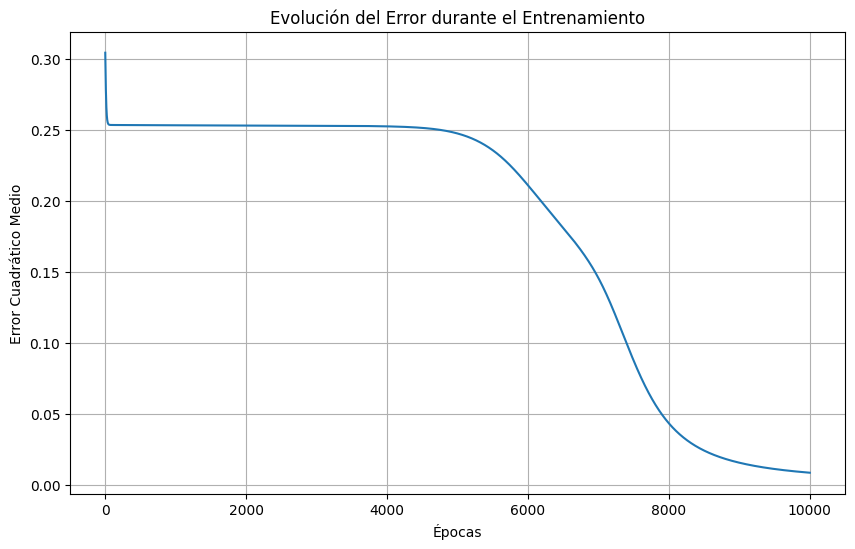

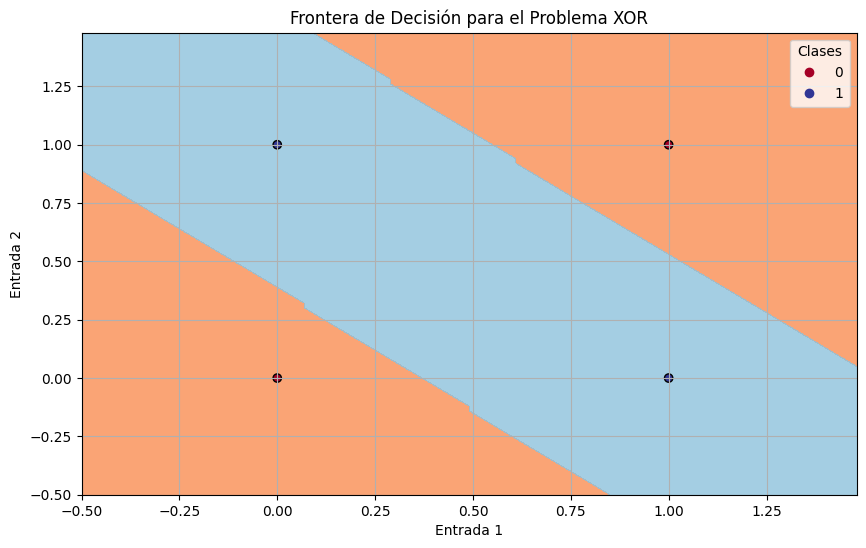

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- IMPLEMENTACIÓN DE BACKPROPAGATION DESDE CERO ---

def sigmoid(x):
    """Calcula la función sigmoide."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Calcula la derivada de la función sigmoide."""
    return x * (1 - x)

class NeuralNetwork:
    """
    Una red neuronal simple con una capa oculta, entrenada con backpropagation.
    """
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        # Inicialización de pesos con valores aleatorios pequeños
        self.weights_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
        self.weights_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))
        self.bias_hidden = np.zeros((1, hidden_nodes))
        self.bias_output = np.zeros((1, output_nodes))

    def feed_forward(self, inputs):
        """Paso de propagación hacia adelante."""
        hidden_layer_activation = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(hidden_layer_activation)
        output_layer_activation = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        predicted_output = sigmoid(output_layer_activation)
        return predicted_output

    def train(self, training_inputs, training_outputs, learning_rate, epochs):
        """
        Entrena la red y devuelve el historial de errores.
        """
        print("Entrenando la red neuronal...")
        error_history = []
        for epoch in range(epochs):
            total_epoch_error = 0
            for inputs, target_output in zip(training_inputs, training_outputs):
                predicted_output = self.feed_forward(inputs)
                error = target_output - predicted_output
                total_epoch_error += np.mean(error**2)

                output_delta = error * sigmoid_derivative(predicted_output)
                hidden_error = output_delta.dot(self.weights_hidden_output.T)
                hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

                self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
                self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
                self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
                self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
            
            avg_error = total_epoch_error / len(training_inputs)
            error_history.append(avg_error)
            if (epoch % 1000) == 0:
                print(f"Época {epoch}, Error: {avg_error:.4f}")
        print("Entrenamiento finalizado.\n")
        return error_history

    def predict(self, inputs):
        """Realiza una predicción para una nueva entrada."""
        # Asegurarse de que la entrada tiene 2 dimensiones para el producto punto
        if inputs.ndim == 1:
            inputs = inputs.reshape(1, -1)
        return self.feed_forward(inputs)

# --- FUNCIONES PARA GRAFICAR ---

def plot_error_history(error_history):
    """Grafica la evolución del error durante el entrenamiento."""
    plt.figure(figsize=(10, 6))
    plt.plot(error_history)
    plt.title('Evolución del Error durante el Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Error Cuadrático Medio')
    plt.grid(True)
    plt.savefig('error_history.png')
    print("Gráfico de la historia de errores guardado como 'error_history.png'")

def plot_decision_boundary(model, X, y):
    """Grafica la frontera de decisión aprendida por el modelo para el problema XOR."""
    plt.figure(figsize=(10, 6))
    
    # Crear una malla de puntos para evaluar el modelo
    h = .02  # tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Realizar predicciones sobre toda la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Dibujar el contorno y los puntos de entrenamiento
    plt.contourf(xx, yy, Z > 0.5, cmap=plt.cm.RdYlBu, alpha=0.8)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.RdYlBu, edgecolors='k')
    
    plt.title('Frontera de Decisión para el Problema XOR')
    plt.xlabel('Entrada 1')
    plt.ylabel('Entrada 2')
    plt.legend(*scatter.legend_elements(), title="Clases")
    plt.grid(True)
    plt.savefig('decision_boundary.png')
    print("Gráfico de la frontera de decisión guardado como 'decision_boundary.png'")

# --- PREPARACIÓN DE DATOS Y ENTRENAMIENTO ---
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

epochs = 10000
learning_rate = 0.1
input_nodes, hidden_nodes, output_nodes = 2, 4, 1

nn = NeuralNetwork(input_nodes=input_nodes, hidden_nodes=hidden_nodes, output_nodes=output_nodes)
history = nn.train(X_train.reshape(4, 1, 2), y_train, learning_rate, epochs)

# --- GENERACIÓN DE GRÁFICOS Y RESULTADOS ---
plot_error_history(history)
plot_decision_boundary(nn, X_train, y_train)

print("\n--- PREDICCIONES FINALES ---")
for i in range(len(X_train)):
    prediction = nn.predict(X_train[i:i+1])
    print(f"Entrada: {X_train[i]}, Predicción: {prediction[0][0]:.4f} -> {np.round(prediction[0][0])}")

# Para mostrar los gráficos en pantalla si se ejecuta localmente
plt.show()